ref：https://blog.csdn.net/csqazwsxedc/article/details/69690655

In [14]:
from numpy import *
import os

# 读取数据

In [22]:
dataMat = []
labelMat = []
fr = open(filename)
for line in fr.readlines():
    lineArr = line.strip().split()
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
    labelMat.append(int(lineArr[2]))

In [23]:
dataMat[0:5]

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862],
 [1.0, -1.322371, 7.152853],
 [1.0, 0.423363, 11.054677]]

In [24]:
labelMat[0:5]

[0, 1, 0, 0, 0]

# 定义sigmoid函数

In [61]:
def sigmoid(x):  
    return 1.0/(1+exp(-x))

# 梯度上升求最优参数

In [62]:
dataMatrix=mat(dataMat) #将读取的数据转换为矩阵
classLabels=mat(labelMat).transpose() #将读取的数据转换为矩阵
m,n = shape(dataMatrix)
alpha = 0.001  #设置梯度的阀值，该值越大梯度上升幅度越大
maxCycles = 1000 #设置迭代的次数，一般看实际数据进行设定，有些可能200次就够了
weights = ones((n,1)) #设置初始的参数，并都赋默认值为1。注意这里权重以矩阵形式表示三个参数。
for k in range(maxCycles):
    h = sigmoid(dataMatrix*weights)
    error = (classLabels - h)     #求导后差值
    weights = weights + alpha * dataMatrix.transpose()* error #迭代更新权重

In [63]:
weights

matrix([[ 5.262118  ],
        [ 0.60847797],
        [-0.75168429]])

In [58]:
weightsA=weights.getA()#矩阵转为数组

In [59]:
weightsA

array([[ 5.262118  ],
       [ 0.60847797],
       [-0.75168429]])

# 画出最终分类的图

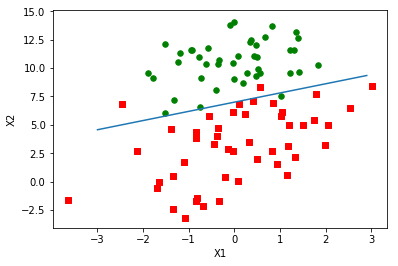

In [60]:
import matplotlib.pyplot as plt

dataArr = array(dataMat)
n = shape(dataArr)[0]
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []
for i in range(n):
    if int(labelMat[i])== 1:
        xcord1.append(dataArr[i,1])
        ycord1.append(dataArr[i,2])
    else:
        xcord2.append(dataArr[i,1])
        ycord2.append(dataArr[i,2])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')
x = arange(-3.0, 3.0, 0.1)
y = (-weightsA[0]-weightsA[1]*x)/weightsA[2]
ax.plot(x, y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()